In [76]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


In [77]:
txtfile = pd.read_csv("data.txt", sep="\t", header=None,encoding="utf-16",skiprows=1)
txtdata =txtfile[[2,3,4]][2:10] 
print(txtdata)


        2       3       4
2  1.8638  0.0763    0.69
3  1.3156  0.6192  0.5265
4  0.9785  0.7019  0.6062
5  0.8191   0.658  0.4605
6  0.5741   0.444  0.8629
7  0.3422  0.5583   0.032
8  0.2275  0.5316  0.0326
9  0.1260  0.5515  0.0329


In [78]:
dataframe1 = pd.read_csv("template.csv",header=None)
sampleSet = dataframe1[[1,2,3]][2:10]
print(sampleSet)


                    1                2          3
2  Standard-2000ug/mL  Standard-0ug/mL   Sample-8
3  Standard-1500ug/mL         Sample-1   Sample-9
4  Standard-1000ug/mL         Sample-2  Sample-10
5   Standard-750ug/mL         Sample-3  Sample-11
6   Standard-500ug/mL         Sample-4  Sample-12
7   Standard-250ug/mL         Sample-5        NaN
8   Standard-125ug/mL         Sample-6        NaN
9    Standard-25ug/mL         Sample-7        NaN


In [183]:
dictOfStandards = {}
dictOfSamples = {}
for column1,column2 in zip(sampleSet,txtdata):
    for sample,data in zip(sampleSet[column1],txtdata[column2]):
        if not pd.isna(sample):
            splitSample = sample.split("-")
            if splitSample[0] == "Standard":
                splitUnits = splitSample[1].split("ug/mL")
                dictOfStandards[int(splitUnits[0])] = float(data)
            elif splitSample[0] == "Sample":
                dictOfSamples[splitSample[1]] = float(data)

print(dictOfStandards)
print(dictOfSamples)

{2000: 1.8638, 1500: 1.3156, 1000: 0.9785, 750: 0.8191, 500: 0.5741, 250: 0.3422, 125: 0.2275, 25: 0.126, 0: 0.0763}
{'1': 0.6192, '2': 0.7019, '3': 0.658, '4': 0.444, '5': 0.5583, '6': 0.5316, '7': 0.5515, '8': 0.69, '9': 0.5265, '10': 0.6062, '11': 0.4605, '12': 0.8629}


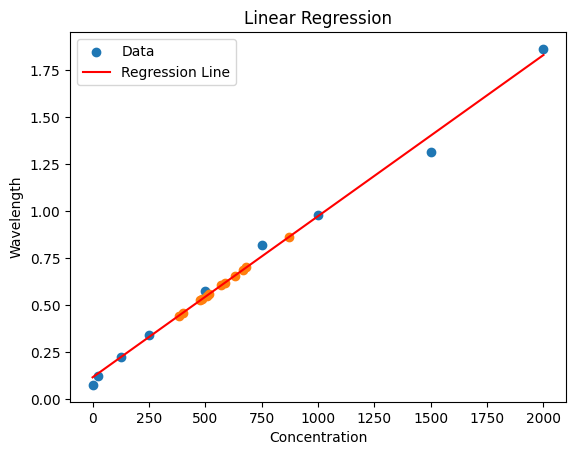

[0.11665181 0.13808772 0.22383136 0.33101091 0.54537    0.75972909
 0.97408818 1.40280637 1.83152455]
[   0   25  125  250  500  750 1000 1500 2000]
[0.0763 0.126  0.2275 0.3422 0.5741 0.8191 0.9785 1.3156 1.8638]


In [186]:
#Make the standard Linear Regression

x = np.flip(np.array(list(dictOfStandards.keys())).reshape(-1, 1))
y = np.flip(np.array(list(dictOfStandards.values())))
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Concentration')
plt.ylabel('Wavelength')
plt.title("Linear Regression")
plt.legend()


#Find the X coordinate for samples
m = model.coef_[0]
b = model.intercept_

samplePlots = {}

listOfSampleConcentrations = list(dictOfSamples.values())

for concentration in listOfSampleConcentrations:
    valueOfX = (concentration - b) / m
    samplePlots[valueOfX] = concentration


sampleX = np.flip(np.array(list(samplePlots.keys())))
sampleY = np.flip(np.array(list(samplePlots.values())))


plt.scatter(sampleX, sampleY, label='Sample')

plt.show()

